<h2>Two-Dimensional Fields</h2>

These fields do not involve any interpolation from the model's vertical grid to a user-specified vertical grid such as an isobaric surface. As such, they are fairly straightforward to plot. The example below plots the sea-level pressure forecast valid at 0000 UTC 8 October 2016 from the Assignment 1 Hurricane Matthew tutorial case.

This example was drawn from the wrf-python Plotting Examples gallery (https://wrf-python.readthedocs.io/en/latest/plot.html) with only minor tweaks. More information on how to use wrf-python is available at https://wrf-python.readthedocs.io/en/main/basic_usage.html.

<hr>

We start by importing the needed modules. These are drawn from five packages - netCDF4, matplotlib, numpy, cartopy, and wrf (short for wrf-python).

In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib.ticker as mticker
import numpy as np
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)

Open the desired wrfout file (which in this instance contains data only for a single output time):

In [2]:
ncfile = Dataset("wrfout_d01_2016-10-08_00:00:00")

Extract the sea-level pressure field from the wrfout file. Note that this is a field that wrf-python derives from the model output; the full list of variables that wrf-python can derive is available at https://wrf-python.readthedocs.io/en/latest/user_api/generated/wrf.getvar.html. We also smooth the sea-level pressure field using wrf-python's smooth2d helper function. Other smoothing functions are available as part of the scipy package.

In [3]:
slp = getvar(ncfile, "slp")
smooth_slp = smooth2d(slp, 3, cenweight=4)

Next, we get the latitude and longitude points, as defined by the sea-level pressure variable's coordinates. We also get the model's map projection, as defined by the sea-level pressure variable's attributes.

In [4]:
lats, lons = latlon_coords(slp)
cart_proj = get_cartopy(slp)

The remainder of the plot-generation code is contained in a single code block below. This is due to a Python quirk; a map-based figure is generated before we add any data to it if we try to break the code up into separate code blocks. Please see the comment blocks below to interpret the code.

/opt/tljh/user/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


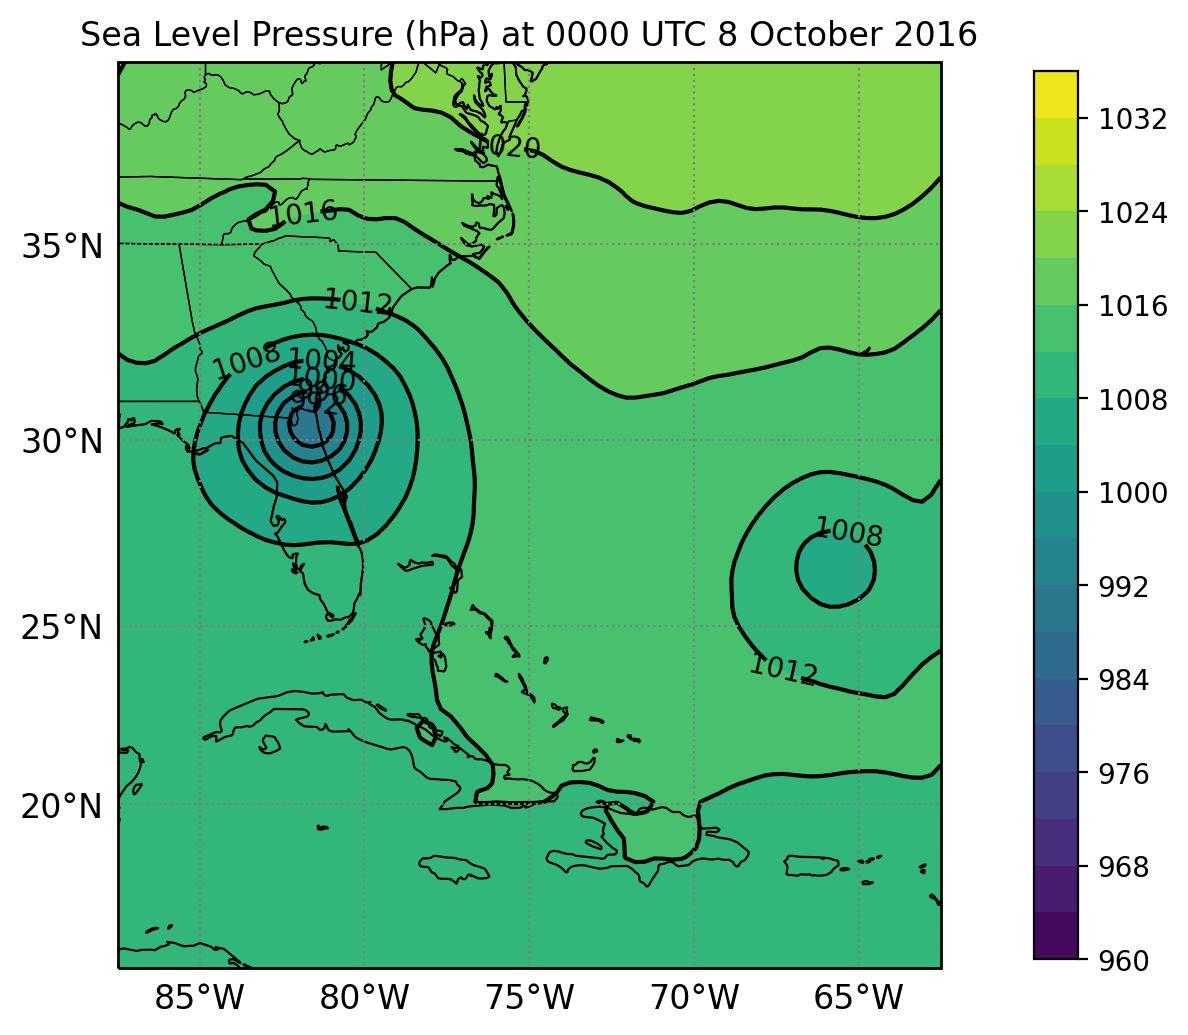

In [5]:
# Create a figure instance.
fig = plt.figure(figsize=(12,6), dpi=200.)

# Create a set of axes for the figure and set
# its map projection to that from the slp variable,
# which matches WRF's map projection.
ax = plt.axes(projection=cart_proj)

# Add state borders and coastlines.
# These commands automatically download the needed
# data if they have not previously been downloaded.
states = NaturalEarthFeature(category="cultural", scale="50m",
                             facecolor="none",
                             name="admin_1_states_provinces_shp")
ax.add_feature(states, linewidth=.5, edgecolor="black")
ax.coastlines('50m', linewidth=0.8)

# Create solid contours of the smoothed slp field.
# We specify contour levels from 960 hPa (inclusive)
# to 1040 hPa (exclusive) every 4 hPa. We then add
# contour labels. Note the transform operator - this
# defines how we want to plot the data and is independent
# of the model's map projection (defined by cart_proj).
contours = plt.contour(to_np(lons), to_np(lats), to_np(smooth_slp), np.arange(960.,1040.,4.), colors="black",
            transform=crs.PlateCarree())
ax.clabel(contours, inline=True, fontsize=10)

# Fill in the contours of the smoothed slp field. We
# specify the same contour levels as for the solid
# contours so that the two match. The cmap option
# tells Python which matplotlib colormap to use
# when determining colors. More info on colormaps:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.contourf(to_np(lons), to_np(lats), to_np(smooth_slp), np.arange(960.,1040.,4.),
             transform=crs.PlateCarree(),cmap=get_cmap("viridis"))

# Add a colorbar, which Python will place automatically relative
# to the set of axes we defined earlier. We shrink it slightly
# to give it a slightly better fit on the image.
plt.colorbar(ax=ax, shrink=.98)

# Set the map's bounds to match those of the input data.
ax.set_xlim(cartopy_xlim(smooth_slp))
ax.set_ylim(cartopy_ylim(smooth_slp))

# Add latitude/longitude gridlines.
# The first line sets up basic gridline parameters - grey dotted lines with labels.
# The next two lines suppress drawing labels on the top and right sides of the plot,
#    making the plot's labels consistent with typical map conventions.
# The next two lines specify how frequently to draw gridlines - here, every
#    5 deg lat/lon. It may be best to comment these two lines out the first
#    time you run the code to see the plot's overall extent, then determine
#    how frequently you wish to draw the gridlines in each direction.
# The next two lines control aspects of labeling the gridlines, here their
#    font size and text color.
# Lastly, the final two lines format the gridline numbers in deg N/S/E/W format.
# More information: https://scitools.org.uk/cartopy/docs/latest/matplotlib/gridliner.html
gridlines = ax.gridlines(color="grey", linestyle="dotted", draw_labels=True)
gridlines.xlabels_top = False
gridlines.ylabels_right = False
gridlines.xlocator = mticker.FixedLocator(np.arange(-90.,-55.,5.))
gridlines.ylocator = mticker.FixedLocator(np.arange(15.,45.,5.))
gridlines.xlabel_style = {'size':12, 'color':'black'}
gridlines.ylabel_style = {'size':12, 'color':'black'}
gridlines.xformatter = LONGITUDE_FORMATTER
gridlines.yformatter = LATITUDE_FORMATTER

# Add a plot title, then show the image.
plt.title("Sea Level Pressure (hPa) at 0000 UTC 8 October 2016")
plt.show()